In [3]:
import datasets
import torchvision.transforms.v2

In [2]:
pip install ipywidgets

  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl (914 kB)
Using cached widgetsnbextension-4.0.15-py3-none-any.whl (2.2 MB)

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from datasets import load_dataset

# Укажите тот же путь, который вы использовали при скачивании
cache_dir = "./my_dataset_folder"

# Библиотека проверит папку и мгновенно загрузит данные из кэша
dataset = load_dataset("deepcopy/MathWriting-human", cache_dir=cache_dir)



In [12]:
sample = dataset["train"][0]
image = sample["image"]
latex = sample["latex"]

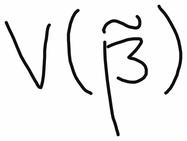

In [13]:
image.convert("L")

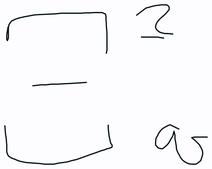

In [4]:
image

In [134]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
latex

'\\Xi_{q}^{z}'

In [136]:
sample

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=125x32>,
 'latex': 'u_{0}=\\frac{4}{(n\\pi)^{2}}dQU_{el}',
 'sample_id': '05607d04dfabb922',
 'split_tag': 'train',
 'data_type': 'human'}

In [137]:
dataset["train"]

Dataset({
    features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
    num_rows: 229864
})

In [138]:
from transformers import BeitModel, BeitConfig
import torch

KeyboardInterrupt: 

In [13]:
model = BeitModel.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")

config.json: 0.00B [00:00, ?B/s]

E:\Projects_pycharm\AIboardNotes2\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ХХХ\.cache\huggingface\hub\models--microsoft--beit-base-patch16-224-pt22k-ft22k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

In [18]:
Beit = model

In [19]:
Beit

BeitModel(
  (embeddings): BeitEmbeddings(
    (patch_embeddings): BeitPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BeitEncoder(
    (layer): ModuleList(
      (0): BeitLayer(
        (attention): BeitAttention(
          (attention): BeitSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=False)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (relative_position_bias): BeitRelativePositionBias()
          )
          (output): BeitSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): BeitIntermediate(
          (dense): Linear(in_features=768, out_fea

In [8]:
train_dataset = dataset["train"]

In [9]:
train_dataset

Dataset({
    features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
    num_rows: 229864
})

In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
    transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
    #transforms.ToTensor(),                        # [1, H, W], float32 [0,1]
])

In [9]:
image.size

(212, 169)

In [10]:
from PIL import ImageEnhance

In [11]:
ImageEnhance.Brightness(image)

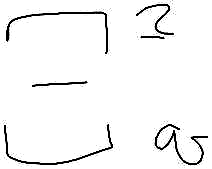

In [12]:
transform(image)

In [23]:
H

480

In [22]:
W = int(os.getenv("W"))
H = int(os.getenv("H"))

In [4]:
from datasets import load_dataset
from torchvision import transforms
from tqdm import trange
from dotenv import load_dotenv
import os

load_dotenv()

W = os.getenv("W")
H = os.getenv("H")

# путь при скачивании
cache_dir = "./my_dataset_folder"
print("загрузка...")
# библиотека проверит папку и мгновенно загрузит данные из кэша
dataset = load_dataset("deepcopy/MathWriting-human", cache_dir=cache_dir)
print("загружено успешно")

transform = transforms.Compose([
    transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
    transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
    transforms.ToTensor(),                        # [1, H, W], float32 [0,1]
])

tr = dataset["train"]

images = []
latex = []

for i in trange(len(tr)):
    cur = tr[i]
    im = transform(cur["image"])
    txt = cur["latex"]
    print(im)
    print(im.size())
    images.append(im)
    latex.append(txt)
    if i == 0:
        break

загрузка...
загружено успешно


  0%|          | 0/229864 [00:00<?, ?it/s]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
torch.Size([1, 141, 187])


In [20]:
images

[tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
       

In [21]:
latex

['V(\\tilde{\\beta})',
 'GL(V)\\times S_{n}',
 '\\tilde{f}:X\\rightarrow M_{f}',
 '\\{g_{1},g_{2},g_{3}\\}',
 '\\frac{418^{163}}{(197^{4}\\cdot10)}',
 'g(z)=\\frac{1}{f(z)-\\mu}',
 '(\\begin{matrix}-1&-1\\\\ 1&0\\end{matrix})',
 '(\\frac{6}{194})^{\\frac{\\frac{397}{5}}{86}}',
 '\\Xi_{q}^{z}',
 '(\\begin{matrix}n\\\\ k\\end{matrix})',
 '((\\frac{5}{17})^{1})^{(270^{2}-8)}',
 '\\int vds',
 'u_{0}=\\frac{4}{(n\\pi)^{2}}dQU_{el}',
 'w=\\sum_{i=1}^{m}\\alpha_{i}u_{i}\\otimes v_{i}',
 'Z_{y^{\\beta}}',
 '\\beta_{s+2}(q)=\\frac{\\lambda_{s+2}(q)}{q}',
 't_{1}=\\frac{AB}{c+v}+\\frac{DE}{\\frac{c}{n}-v}',
 '0\\notin F',
 '(\\begin{matrix}1&d\\\\ 0&1\\end{matrix})',
 '\\nu',
 'log_{b}(\\sqrt[y]{x})=\\frac{log_{b}(x)}{y}',
 'E=\\frac{mz^{3}}{\\sqrt{1+\\frac{f^{3}}{z^{3}}}}',
 '\\overline{lim}',
 '\\frac{\\partial u}{\\partial y}',
 'A\\overline{B}',
 'z=-1(L_{3})',
 '\\frac{3}{4}V_{g}+V_{e}',
 '\\int_{L}f(z)dz',
 '(\\frac{248}{10}/372-43)',
 '\\frac{du}{dy}',
 '\\vec{r}=[\\begin{matrix}1\\\\ 1\\

In [23]:
import torch

In [24]:
new_im = torch.stack(images)

RuntimeError: stack expects each tensor to be equal size, but got [1, 141, 187] at entry 0 and [1, 129, 459] at entry 1

In [5]:
from dotenv import load_dotenv
import os

load_dotenv()

print(int(os.getenv("W")))

640


In [147]:
import torch

In [104]:
W = 640
H = 480

In [106]:
H

480

In [148]:
import random

In [186]:
class SmartResizer(torch.nn.Module):
    def forward(self, img):
        if img.size[0] > W or img.size[1] > H:
            k = min(W / img.size[0], H / img.size[1])
            #print(k)
            resizer = transforms.Compose([
                transforms.Resize((int(k * img.size[1]), int(k * img.size[0])))
            ])
            img = resizer(img)
        dx = W - img.size[0]
        dy = H - img.size[1]
        pl = 0 # left
        pu = 0 # up
        pr = 0 # right
        pd = 0 # down
        if dx > 0:
            # Add in dim=-1
            border = random.randint(1, dx + 1)
            pl = border - 1
            pr = dx - border
        if dy > 0:
            # Add in dim=-1
            border = random.randint(1, dy + 1)
            pd = border - 1
            pu = dy - border

        padder = transforms.Pad((pl, pu, pr, pd)) # left, top, right and bottom
        img = padder(img)

        return img

In [187]:
import random


In [188]:
test_transform = transforms.Compose([
    SmartResizer(),

])

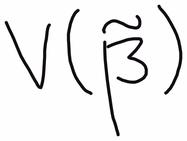

In [189]:
image

In [190]:
a = test_transform(image)

In [191]:
a.size

(639, 479)

In [192]:
image.size

(187, 141)

In [193]:
from torchvision import transforms

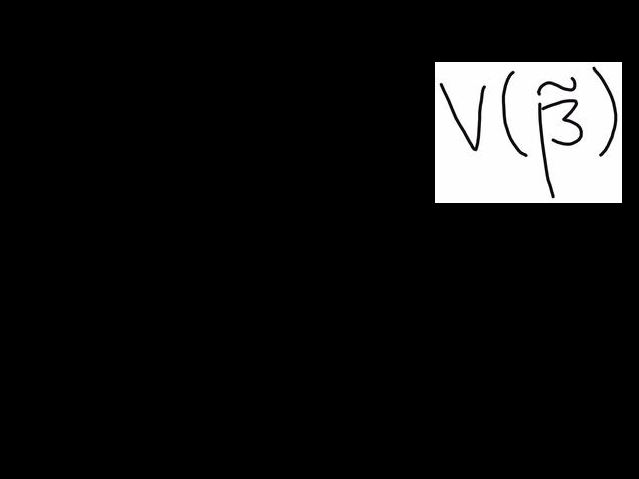

In [194]:
a

Resize(size=(5, 5), interpolation=bilinear, max_size=None, antialias=True)